<a href="https://colab.research.google.com/github/Santosh-Gupta/TaxiExercise/blob/master/Taxi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Imports

import urllib.request
import pandas as pd
from itertools import islice
import datetime
import sklearn
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing

In [2]:
#Download data

url = 'https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv'
urllib.request.urlretrieve(url, 'green_tripdata_2015-09.csv')

('green_tripdata_2015-09.csv', <http.client.HTTPMessage at 0x7f7991767668>)

In [0]:
#Open data

df = pd.read_csv( 'green_tripdata_2015-09.csv')

Observe the head, tail, and random samples from the data

In [4]:
df.head(50)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,0.00,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,0.00,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,0.59,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,0.61,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
5,2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297,40.808186,-73.937668,40.821198,1,1.07,5.5,0.5,0.5,1.36,0.0,NaN,0.3,8.16,1,1.0
6,2,2015-09-01 00:00:52,2015-09-01 00:05:50,N,1,-73.890877,40.746426,-73.876923,40.756306,1,1.43,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,1,1.0
7,2,2015-09-01 00:02:15,2015-09-01 00:05:34,N,1,-73.946701,40.797321,-73.937645,40.804516,1,0.90,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
8,2,2015-09-01 00:02:36,2015-09-01 00:07:20,N,1,-73.963150,40.693829,-73.956787,40.680531,1,1.33,6.0,0.5,0.5,1.46,0.0,NaN,0.3,8.76,1,1.0
9,2,2015-09-01 00:02:13,2015-09-01 00:07:23,N,1,-73.896820,40.746128,-73.888626,40.752724,1,0.84,5.5,0.5,0.5,0.00,0.0,NaN,0.3,6.80,2,1.0


In [5]:
df.tail(50)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
1494876,1,2015-09-30 23:07:45,2015-09-30 23:25:15,N,1,-73.974678,40.680035,-73.931572,40.680405,1,2.9,14.0,0.5,0.5,2.50,0.0,NaN,0.3,17.80,1,1.0
1494877,1,2015-09-30 23:08:44,2015-09-30 23:17:27,N,1,-73.950203,40.683308,-73.980453,40.676498,1,2.5,9.5,0.5,0.5,0.00,0.0,NaN,0.3,10.80,2,1.0
1494878,1,2015-09-30 23:08:30,2015-09-30 23:24:04,N,1,-73.911575,40.843212,-73.885796,40.815971,2,4.1,15.0,0.5,0.5,0.00,0.0,NaN,0.3,16.30,2,1.0
1494879,1,2015-09-30 23:06:36,2015-09-30 23:08:24,N,1,-73.873985,40.735077,-73.866341,40.736485,1,0.5,3.5,0.5,0.5,0.00,0.0,NaN,0.3,4.80,2,1.0
1494880,1,2015-09-30 23:06:31,2015-09-30 23:21:42,N,1,-73.845192,40.721626,-73.911728,40.744366,1,4.6,16.5,0.5,0.5,4.00,0.0,NaN,0.3,21.80,1,1.0
1494881,1,2015-09-30 23:06:19,2015-09-30 23:08:56,N,1,-73.991234,40.692398,-73.995354,40.683472,1,0.7,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,4,1.0
1494882,1,2015-09-30 23:06:17,2015-09-30 23:16:27,N,1,-73.984215,40.671562,-73.955589,40.657566,1,2.5,10.0,0.5,0.5,3.00,0.0,NaN,0.3,14.30,1,1.0
1494883,1,2015-09-30 23:06:57,2015-09-30 23:16:18,N,1,-73.959053,40.708897,-73.997780,40.714832,1,2.5,10.0,0.5,0.5,2.25,0.0,NaN,0.3,13.55,1,1.0
1494884,1,2015-09-30 23:07:08,2015-09-30 23:14:42,N,1,-73.896507,40.746334,-73.882530,40.730713,2,1.8,8.0,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2,1.0
1494885,1,2015-09-30 23:07:17,2015-09-30 23:20:40,N,1,-73.924713,40.827271,-73.926743,40.860897,1,4.5,15.5,0.5,0.5,3.35,0.0,NaN,0.3,20.15,1,1.0


In [6]:
df.sample(200)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
1057017,2,2015-09-21 19:35:30,2015-09-21 19:55:53,N,1,-73.862869,40.737125,-73.843536,40.692574,1,4.44,17.0,1.0,0.5,0.00,0.0,NaN,0.3,18.80,2,1.0
1120840,2,2015-09-23 12:36:20,2015-09-23 12:45:44,N,1,-73.943092,40.810219,-73.923660,40.825081,6,1.87,9.0,0.0,0.5,0.00,0.0,NaN,0.3,9.80,2,1.0
156650,1,2015-09-04 14:26:22,2015-09-04 14:38:37,N,1,-73.917641,40.743500,-73.911400,40.758698,1,2.00,10.0,0.0,0.5,0.00,0.0,NaN,0.3,10.80,2,1.0
925058,2,2015-09-19 12:58:24,2015-09-19 13:02:20,N,1,-73.950310,40.680397,-73.953377,40.677120,1,0.64,4.5,0.0,0.5,0.00,0.0,NaN,0.3,5.30,1,1.0
1262987,2,2015-09-26 10:02:51,2015-09-26 10:25:55,N,1,-73.948639,40.828960,-73.986954,40.712780,1,11.16,32.5,0.0,0.5,3.00,0.0,NaN,0.3,36.30,1,1.0
148513,1,2015-09-04 10:31:55,2015-09-04 10:36:16,N,1,-73.909332,40.770103,-73.915154,40.776012,2,0.70,5.0,0.0,0.5,0.00,0.0,NaN,0.3,5.80,2,1.0
449623,2,2015-09-10 12:40:03,2015-09-10 12:48:29,N,1,-73.870964,40.733826,-73.891418,40.731136,1,1.32,7.5,0.0,0.5,0.00,0.0,NaN,0.3,8.30,2,1.0
197540,2,2015-09-05 03:09:11,2015-09-05 03:17:42,N,1,-73.918510,40.758717,-73.919037,40.737339,1,1.78,8.5,0.5,0.5,0.00,0.0,NaN,0.3,9.80,2,1.0
630381,2,2015-09-13 11:15:31,2015-09-13 11:25:21,N,1,-73.893898,40.746552,-73.897034,40.754429,1,1.19,7.5,0.0,0.5,0.00,0.0,NaN,0.3,8.30,2,1.0
1403701,2,2015-09-28 23:36:23,2015-09-28 23:54:00,N,1,-73.956635,40.718830,-73.881592,40.742329,1,5.40,19.0,0.5,0.5,0.00,0.0,NaN,0.3,20.30,2,1.0


# Since the day of the week may have an effect on tips, a column is added for this. 

In [0]:
df['year'] = df['lpep_pickup_datetime'].str[0:4]
df['month'] = df['lpep_pickup_datetime'].str[5:7]
df['day'] = df['lpep_pickup_datetime'].str[8:10]
df['DayStart'] = df.apply(lambda row:  datetime.date(int(row['year']), int(row['month']), int(row['day'] )).weekday(), axis=1)

#All dates are on the same year and money, so this data can be deleted

del df['month']
del df['year']

In [4]:
# Here, 0 is Monday, 1 is Tuesday, 2 is Wednesday, etc. 

df['DayStart'].sample(10)

741136     1
1392704    0
698141     0
1137403    2
1298238    5
600505     5
518123     4
523420     4
755918     2
704007     1
Name: DayStart, dtype: int64

# A column is also added to indicate what hour the trip starts. For the purpose of this exercise, minute and second data are neglected. 

In [0]:
df['hour'] = df['lpep_pickup_datetime'].str[11:13].astype(int)

In [6]:
# The time is based on a 24 hour clock. 0 is 12am, 1 is 1am, 13 is 1pm, 14 is 2pm, etc. 

df['hour'].sample(10)

333385     20
1014705    20
1492087    22
1026002     1
1245932     0
1430344    17
942854     18
1438845    20
1004882    17
894026     23
Name: hour, dtype: int64

# The following cells further observes the data

In [7]:
#Number of data points

df.shape

(1494926, 24)

In [8]:
# Get statistics of continuous variables.

df[['Passenger_count', 'Trip_distance' , 'Fare_amount', 'Extra',  'MTA_tax', 'Tip_amount',  'Tolls_amount', 'improvement_surcharge', 'Total_amount' ]].describe()

,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06
mean,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,2.920991e-01,1.503215e+01
std,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,5.074009e-02,1.155316e+01
min,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,-3.000000e-01,-4.750000e+02
25%,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.160000e+00
50%,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.176000e+01
75%,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.830000e+01
max,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,3.000000e-01,5.813000e+02


# The following cells explores the data through histograms, looks for anomalies, and cleans the data when possible. 

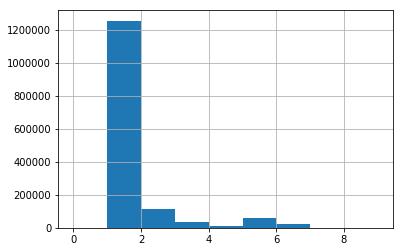

In [9]:
# Look at distribution of passengers

df['Passenger_count'].hist(bins=9)

# It seems that there are data points where the number of passengers are zero. The data dictionary defined the number of passangers as "The number of passengers in the vehicle.This is a driver-entered value.", so there should always be one. The cell below further explores the zero passanger data

In [10]:
df[df['Passenger_count']==0]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,day,DayStart,hour
1097,1,2015-09-01 00:44:17,2015-09-01 00:51:18,N,5,-73.921661,40.706581,-73.895645,40.703232,0,1.70,0.00,0.0,0.0,0.00,0.0,NaN,0.0,0.00,2,2.0,01,1,0
2129,1,2015-09-01 01:07:25,2015-09-01 01:27:51,N,5,-73.931175,40.702847,-74.017197,40.642117,0,9.80,0.00,0.0,0.0,0.00,0.0,NaN,0.0,0.00,2,2.0,01,1,1
2551,2,2015-09-01 02:21:00,2015-09-01 02:33:33,N,5,-73.953094,40.680672,-73.897552,40.677704,0,3.52,20.00,0.0,0.0,0.00,0.0,NaN,0.0,20.00,2,2.0,01,1,2
5572,1,2015-09-01 07:52:57,2015-09-01 08:05:09,N,5,-73.925659,40.838451,-73.923317,40.816864,0,2.00,0.00,0.0,0.0,0.00,0.0,NaN,0.0,0.00,2,2.0,01,1,7
10310,1,2015-09-01 09:04:28,2015-09-01 09:08:16,N,5,-73.948143,40.837135,-73.942070,40.842621,0,0.60,0.00,0.0,0.0,0.00,0.0,NaN,0.0,0.00,2,2.0,01,1,9
19748,2,2015-09-01 15:10:46,2015-09-01 15:11:51,N,5,-73.945427,40.790710,-73.945419,40.790668,0,0.00,6.00,0.0,0.0,0.00,0.0,NaN,0.0,6.00,2,2.0,01,1,15
21648,1,2015-09-01 15:23:33,2015-09-01 15:26:51,N,5,-73.918839,40.821491,-73.912544,40.819122,0,0.40,0.00,0.0,0.0,0.00,0.0,NaN,0.0,0.00,2,2.0,01,1,15
24184,2,2015-09-01 17:07:18,2015-09-01 17:07:24,N,5,-73.945984,40.801441,-73.945984,40.801445,0,0.00,9.00,0.0,0.0,0.00,0.0,NaN,0.0,9.00,1,2.0,01,1,17
26326,1,2015-09-01 17:37:31,2015-09-01 18:00:27,Y,5,-73.984093,40.695251,-73.964676,40.672379,0,2.40,0.00,0.0,0.0,0.00,0.0,NaN,0.0,0.00,2,2.0,01,1,17
26387,1,2015-09-01 17:31:02,2015-09-01 17:34:38,N,5,-73.948143,40.798054,-73.952721,40.791679,0,0.50,0.00,0.0,0.0,0.00,0.0,NaN,0.0,0.00,2,2.0,01,1,17


# The zero passanger data should be further explored, but for the purpose of this exercise, I'll consider this data questionable, and remove it. 

In [0]:
df = df[df['Passenger_count']!=0]

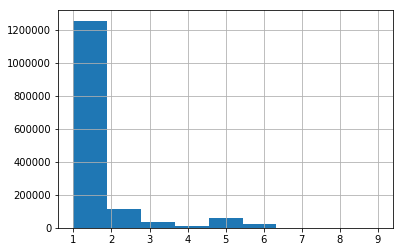

In [12]:
# Look at distribution of passengers

df['Passenger_count'].hist(bins=9)

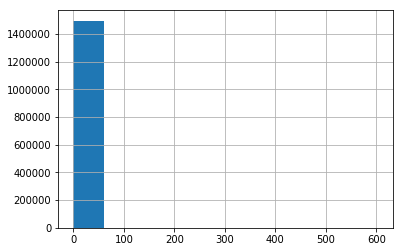

In [13]:
# Look at distribution of Trip distance

df['Trip_distance'].hist(bins=10)

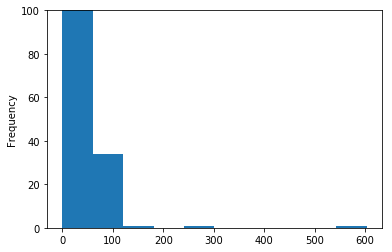

In [14]:
# The vast majority of trip distances are within 50 miles. Zoom in to check rarer cases

df['Trip_distance'].plot.hist(bins=10, ylim=(0,100))

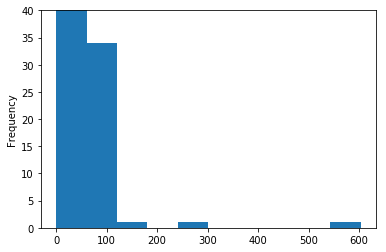

In [15]:
df['Trip_distance'].plot.hist(bins=10, ylim=(0,40))

# This histogram above shows some occurances of trips that extend 50 miles. These are very rare compared to trips that are under 50 miles, 

# The cells below will plot histograms of trips which are under 50 miles

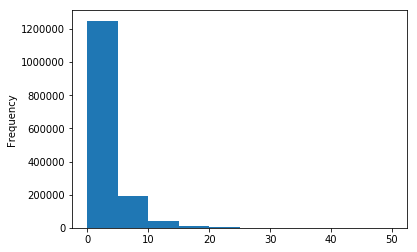

In [16]:
#Only look at trips under 50 miles 

df[df['Trip_distance']<=50]['Trip_distance'].plot.hist(bins=10)

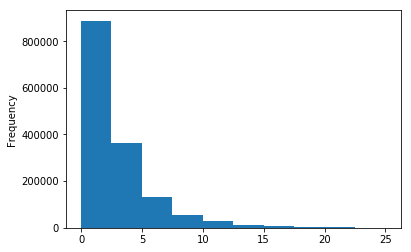

In [17]:
#Only look at trips under 25 miles 


df[df['Trip_distance']<=25]['Trip_distance'].plot.hist(bins=10)

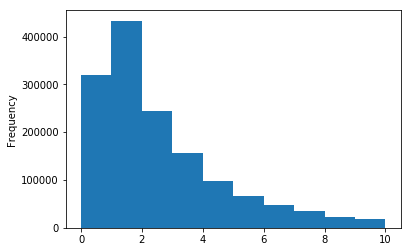

In [18]:
#Only look at trips under 10 miles 

df[df['Trip_distance']<=10]['Trip_distance'].plot.hist(bins=10)

# This appears to be another anomaly, it appears that there are trips which have zero distance

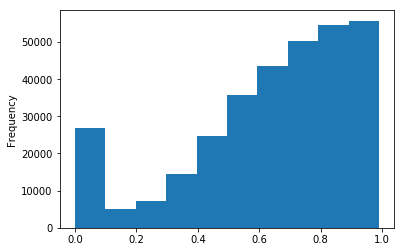

In [19]:
df[df['Trip_distance']<1]['Trip_distance'].plot.hist(bins=10)


# Lets further explore the zero distance data

In [20]:
df[df['Fare_amount']==0]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,day,DayStart,hour
173,2,2015-09-01 00:04:44,2015-09-01 00:19:40,N,1,-73.919662,40.759315,-73.881393,40.746124,1,2.47,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.00,2,1.0,01,1,0
232,2,2015-09-01 00:20:21,2015-09-01 00:24:46,N,5,-73.881287,40.746151,-73.881302,40.746243,1,0.00,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.00,2,2.0,01,1,0
2610,1,2015-09-01 02:40:13,2015-09-01 02:48:17,N,5,-73.929222,40.712719,-73.907997,40.700226,1,1.60,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.00,2,2.0,01,1,2
3372,1,2015-09-01 04:42:50,2015-09-01 05:04:00,N,5,-73.951027,40.825142,-73.918640,40.771809,1,10.20,0.0,0.0,0.0,0.0,5.54,NaN,0.0,5.54,2,2.0,01,1,4
3384,1,2015-09-01 04:34:28,2015-09-01 04:42:38,N,5,-73.904305,40.815365,-73.890091,40.826675,1,1.10,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.00,2,2.0,01,1,4
3431,1,2015-09-01 04:03:14,2015-09-01 04:12:38,N,5,-73.889801,40.862907,-73.909805,40.875717,2,2.30,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.00,2,2.0,01,1,4
3707,1,2015-09-01 05:43:52,2015-09-01 06:17:35,N,5,-73.847656,40.842762,-73.844490,40.833580,1,5.40,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.00,2,2.0,01,1,5
3740,1,2015-09-01 05:26:08,2015-09-01 05:42:35,N,5,-73.948807,40.790829,-73.870445,40.773754,1,7.10,0.0,0.0,0.0,0.0,5.54,NaN,0.0,5.54,2,2.0,01,1,5
4314,1,2015-09-01 06:52:10,2015-09-01 07:02:36,N,5,-73.922218,40.842052,-73.939415,40.813541,1,2.20,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.00,2,2.0,01,1,6
4323,1,2015-09-01 06:49:08,2015-09-01 07:10:44,N,5,-73.954361,40.789970,-73.857277,40.840668,1,8.40,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.00,2,2.0,01,1,6


# The zero distance data results in fares that are 0, and occasionally some tip. This warrents some further investigation, but for the purpose of eventually making a model with this data, these data points are removed

In [0]:
# Remove zero distance data

df=df[df['Trip_distance']>0]


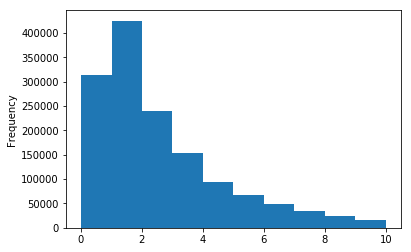

In [22]:
#Check new histogram

df[df['Trip_distance']<10]['Trip_distance'].plot.hist(bins=10)

# Continue with plotting histograms of the data

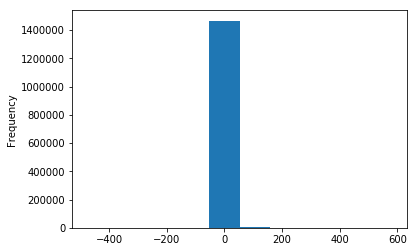

In [23]:
# Histogram of fare amount 

df['Fare_amount'].plot.hist(bins=10)

# The fair amount data looks odd, it has both negative and positive numbers. Lets explore the negative numbers below

In [24]:
df[df['Fare_amount']<0]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,day,DayStart,hour
437,2,2015-09-01 00:31:49,2015-09-01 00:35:08,N,1,-73.903450,40.745419,-73.914360,40.745659,5,0.63,-4.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-5.8,4,1.0,01,1,0
568,2,2015-09-01 00:43:31,2015-09-01 00:44:41,N,1,-73.844284,40.721066,-73.844727,40.720230,1,0.06,-3.0,-0.5,-0.5,0.0,0.0,NaN,-0.3,-4.3,3,1.0,01,1,0
961,2,2015-09-01 00:14:55,2015-09-01 00:15:11,N,2,-73.946716,40.714317,-73.944954,40.714466,2,0.03,-52.0,0.0,-0.5,0.0,0.0,NaN,-0.3,-52.8,4,1.0,01,1,0
1297,2,2015-09-01 01:00:16,2015-09-01 01:01:07,N,1,-73.863174,40.835274,-73.868782,40.836048,1,0.09,-2.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-3.8,3,1.0,01,1,1
6022,2,2015-09-01 08:21:03,2015-09-01 08:21:53,N,1,-73.963753,40.808121,-73.963234,40.810757,1,0.19,-3.0,0.0,-0.5,0.0,0.0,NaN,-0.3,-3.8,3,1.0,01,1,8
7369,2,2015-09-01 08:59:40,2015-09-01 09:10:12,N,1,-73.974754,40.678337,-73.975632,40.679489,1,0.38,-4.5,0.0,-0.5,0.0,0.0,NaN,-0.3,-5.3,3,1.0,01,1,8
11117,2,2015-09-01 10:47:20,2015-09-01 10:50:31,N,1,-73.834045,40.757679,-73.832153,40.758839,1,0.25,-4.0,0.0,-0.5,0.0,0.0,NaN,-0.3,-4.8,3,1.0,01,1,10
11358,2,2015-09-01 10:55:32,2015-09-01 10:56:53,N,5,-73.978912,40.683708,-73.981415,40.680077,1,0.29,-7.0,0.0,0.0,0.0,0.0,NaN,0.0,-7.0,4,2.0,01,1,10
12883,2,2015-09-01 11:42:48,2015-09-01 11:43:09,N,1,-73.954407,40.789806,-73.954689,40.789467,1,0.02,-2.5,0.0,-0.5,0.0,0.0,NaN,-0.3,-3.3,3,1.0,01,1,11
12978,2,2015-09-01 11:52:41,2015-09-01 11:52:45,N,2,-73.956871,40.801666,-73.956650,40.801567,1,0.01,-52.0,0.0,-0.5,0.0,0.0,NaN,-0.3,-52.8,3,1.0,01,1,11


#There seems to be some sort of inconsitancy in the data. Normally, this would need to be explored further, but for the purpose of this exercise, I am going to assume that the data is coming from two different systems, and that 1 of the systems, reported the charge with negative numbers. In the cell below, I am going to convert the numbers to all positive

In [0]:
df['Fare_amount'] = df['Fare_amount'].abs()

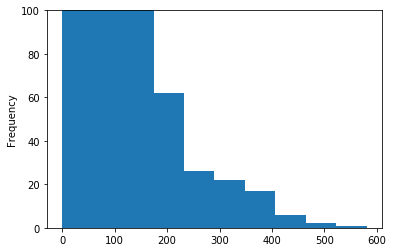

In [26]:
# Zoom in by limiting y axis

df['Fare_amount'].plot.hist(bins=10, ylim=(0,100))

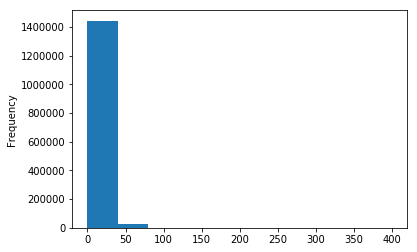

In [27]:
# Limit to data points with fare amounts under 400 to observe most commonly occuring data points

df[df['Fare_amount']<400]['Fare_amount'].plot.hist(bins=10)


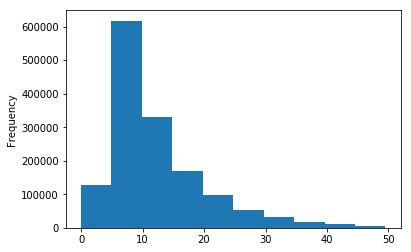

In [28]:
# Limit to data points with fare amounts under 50 to observe most commonly occuring data points

df[df['Fare_amount']<50]['Fare_amount'].plot.hist(bins=10)

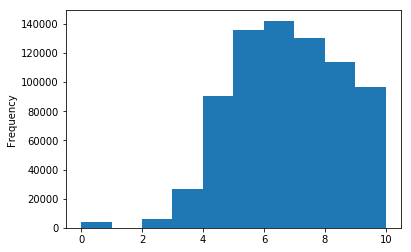

In [29]:
# Limit to data points with fare amounts under 10 to observe most commonly occuring data points

df[df['Fare_amount']<10]['Fare_amount'].plot.hist(bins=10)

In [31]:
#It appears there may be some data where the fare amount is 0 

df[df['Fare_amount']==0]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,day,DayStart,hour
173,2,2015-09-01 00:04:44,2015-09-01 00:19:40,N,1,-73.919662,40.759315,-73.881393,40.746124,1,2.47,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.00,2,1.0,01,1,0
2610,1,2015-09-01 02:40:13,2015-09-01 02:48:17,N,5,-73.929222,40.712719,-73.907997,40.700226,1,1.60,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.00,2,2.0,01,1,2
3372,1,2015-09-01 04:42:50,2015-09-01 05:04:00,N,5,-73.951027,40.825142,-73.918640,40.771809,1,10.20,0.0,0.0,0.0,0.0,5.54,NaN,0.0,5.54,2,2.0,01,1,4
3384,1,2015-09-01 04:34:28,2015-09-01 04:42:38,N,5,-73.904305,40.815365,-73.890091,40.826675,1,1.10,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.00,2,2.0,01,1,4
3431,1,2015-09-01 04:03:14,2015-09-01 04:12:38,N,5,-73.889801,40.862907,-73.909805,40.875717,2,2.30,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.00,2,2.0,01,1,4
3707,1,2015-09-01 05:43:52,2015-09-01 06:17:35,N,5,-73.847656,40.842762,-73.844490,40.833580,1,5.40,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.00,2,2.0,01,1,5
3740,1,2015-09-01 05:26:08,2015-09-01 05:42:35,N,5,-73.948807,40.790829,-73.870445,40.773754,1,7.10,0.0,0.0,0.0,0.0,5.54,NaN,0.0,5.54,2,2.0,01,1,5
4314,1,2015-09-01 06:52:10,2015-09-01 07:02:36,N,5,-73.922218,40.842052,-73.939415,40.813541,1,2.20,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.00,2,2.0,01,1,6
4323,1,2015-09-01 06:49:08,2015-09-01 07:10:44,N,5,-73.954361,40.789970,-73.857277,40.840668,1,8.40,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.00,2,2.0,01,1,6
4335,1,2015-09-01 06:44:24,2015-09-01 06:56:53,N,5,-73.946190,40.824818,-73.901627,40.838444,1,4.40,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.00,2,2.0,01,1,6


# I am unable to think of a justification for why there would be cases of a zero fare. Normally this would need to be investigated further, but for the purpose of this exercise, I am just going to remove these values. 

In [0]:
df=df[df['Fare_amount'] != 0]


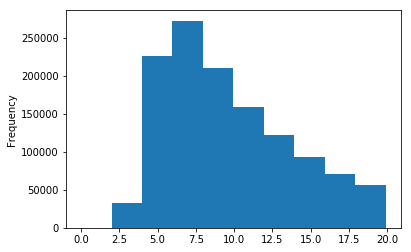

In [34]:
df[df['Fare_amount']<20]['Fare_amount'].plot.hist(bins=10)

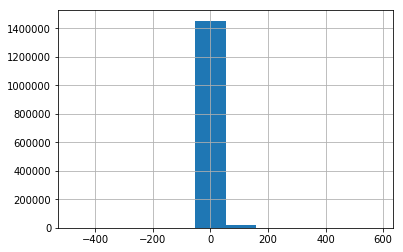

In [35]:
#Histogram of total amount 

df['Total_amount'].hist(bins=10)

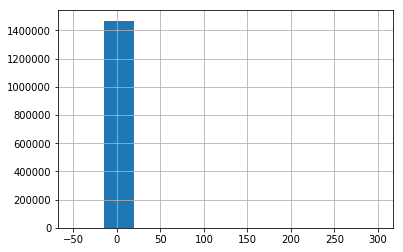

In [52]:
#Histogram of tip amount 

df['Tip_amount'].hist(bins=10)

# There seems to be negative data for the tip amount as well. These data points are explored further below

In [53]:
df[df['Tip_amount']<0]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,day,DayStart,hour
149221,2,2015-09-04 11:27:56,2015-09-04 11:28:53,N,1,-73.969566,40.674946,-73.971123,40.675446,1,0.11,3.0,0.0,-0.5,-12.30,0.0,NaN,-0.3,16.10,3,1.0,04,4,11
402829,2,2015-09-09 13:19:02,2015-09-09 13:19:03,N,5,-73.828918,40.866131,-73.829613,40.865383,1,0.06,56.0,0.0,0.0,-11.20,0.0,NaN,0.0,67.20,3,2.0,09,2,13
486631,2,2015-09-11 01:31:28,2015-09-11 01:32:54,N,1,-73.971291,40.689571,-73.979973,40.689861,5,0.46,3.5,-0.5,-0.5,-0.96,0.0,NaN,-0.3,5.76,1,1.0,11,4,1
1164904,2,2015-09-24 14:28:47,2015-09-24 14:40:11,N,1,-73.955833,40.694618,-73.959076,40.704529,1,0.76,8.0,0.0,-0.5,-50.00,0.0,NaN,-0.3,58.80,4,1.0,24,3,14
1293750,2,2015-09-26 20:24:14,2015-09-27 19:56:24,N,1,-73.985329,40.670219,-73.976715,40.674931,3,0.73,5.0,-0.5,-0.5,-0.63,0.0,NaN,-0.3,6.93,3,1.0,26,5,20
1364593,2,2015-09-28 01:06:40,2015-09-28 01:12:40,N,1,-73.937111,40.764854,-73.936966,40.764725,1,0.01,2.5,-0.5,-0.5,-1.14,0.0,NaN,-0.3,4.94,3,1.0,28,0,1


#I can not think of a justification for negative tip amount. Normally this would be explored further, but for the purpose of this exercise, I'll remove these datapoints

In [0]:
df=df[df['Tip_amount'] >= 0]


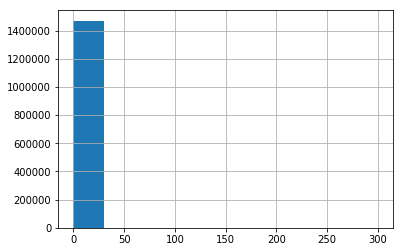

In [55]:
#Histogram of tip amount 

df['Tip_amount'].hist(bins=10)

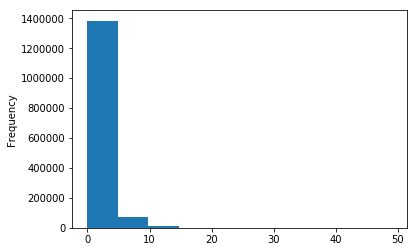

In [56]:
df[df['Tip_amount']<50]['Tip_amount'].plot.hist(bins=10)

# Like with the fare amount, I am going to take the absolute values of this variable, and remove zero values

In [0]:
df['Total_amount'] = df['Total_amount'].abs()
df=df[df['Total_amount'] != 0]


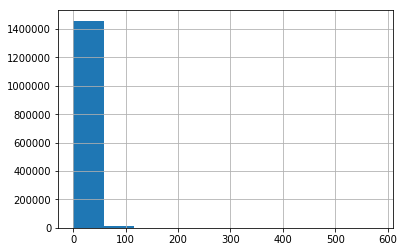

In [37]:
df['Total_amount'].hist(bins=10)

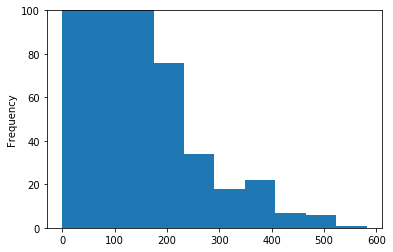

In [38]:
# Zoom in by limiting y axis

df['Total_amount'].plot.hist(bins=10, ylim=(0,100))

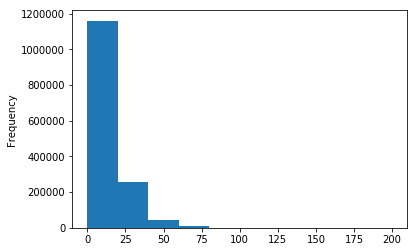

In [39]:
# Limit to data points with total amounts under 200 to observe most commonly occuring data points

df[df['Total_amount']<200]['Total_amount'].plot.hist(bins=10)

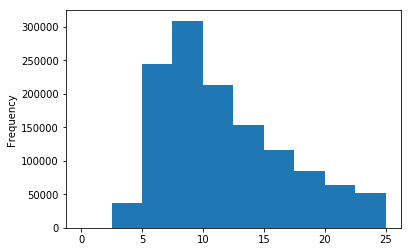

In [40]:
# Limit to data points with total amounts under 25 to observe most commonly occuring data points

df[df['Total_amount']<25]['Total_amount'].plot.hist(bins=10)

# From the hour plot, it seems that peak traffic is around 5pm and lowest activity is 5 am

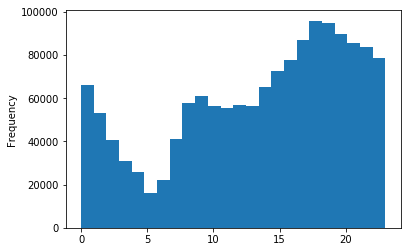

In [42]:
# Histogram of the hour of the day

df['hour'].plot.hist(bins=24 )

# Plot bar graphs for catagorical data 

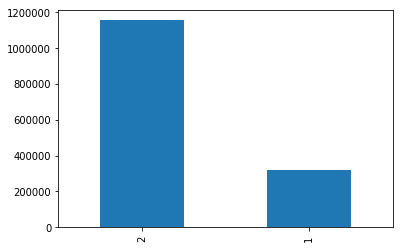

In [43]:
df['VendorID'].value_counts().plot(kind='bar')

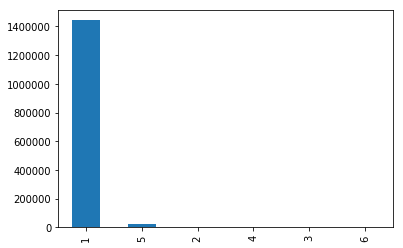

In [44]:
df['RateCodeID'].value_counts().plot(kind='bar')

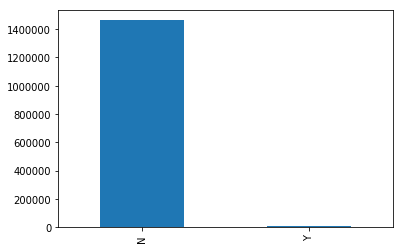

In [46]:
df['Store_and_fwd_flag'].value_counts().plot(kind='bar')

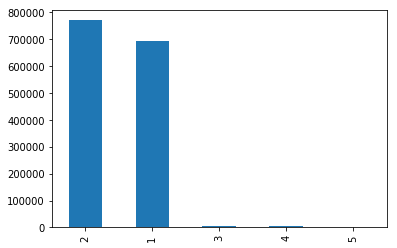

In [47]:
df['Payment_type'].value_counts().plot(kind='bar')

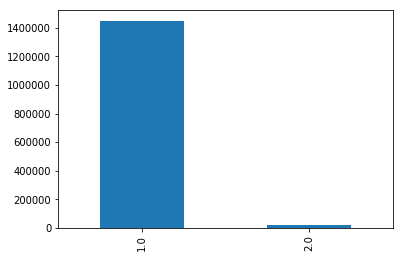

In [48]:
# Column has an extra space in it's label, this is removed

df.rename(columns={'Trip_type ': 'Trip_type'}, inplace=True)

df['Trip_type'].value_counts().plot(kind='bar')

# Monday seems to be the least busy and increases through the week, peaking on Saturday

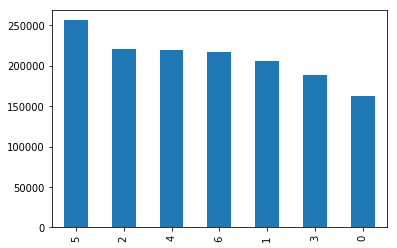

In [49]:
df['DayStart'].value_counts().plot(kind='bar')

# The following cells are for scatter plots of the data focused on the tip amount

## There is a general trend of tip amount increasing from afternoon to late evening

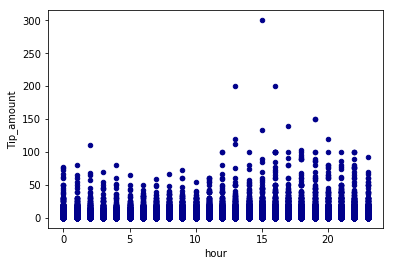

In [59]:
# hour of day vs tip amount 

df.plot.scatter(x='hour', y='Tip_amount', c='DarkBlue')

## It seems that tip amount generally decreases with the number of passengers, though the trend displayed below could be from a class imbalance

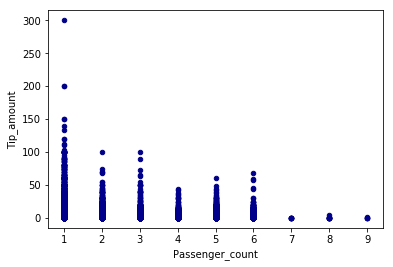

In [58]:
# Passenger_count vs tip amount 

df.plot.scatter(x='Passenger_count', y='Tip_amount', c='DarkBlue')

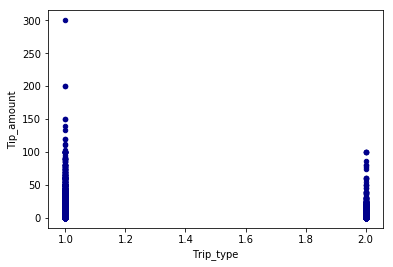

In [57]:
df.plot.scatter(x='Trip_type', y='Tip_amount', c='DarkBlue')

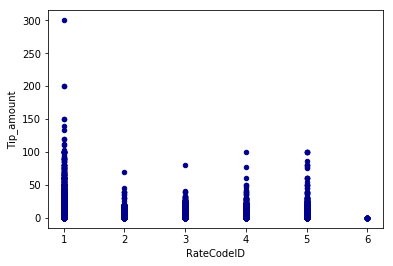

In [60]:
df.plot.scatter(x='RateCodeID', y='Tip_amount', c='DarkBlue')

## It seems that tip amount generally decreases with the increasing the trip distance, though the trend displayed below could be from a class imbalance

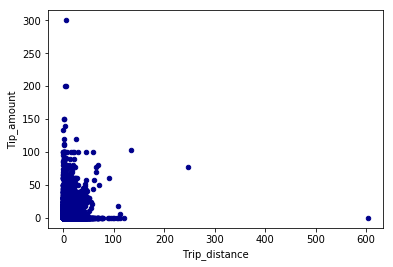

In [61]:
df.plot.scatter(x='Trip_distance', y='Tip_amount', c='DarkBlue')

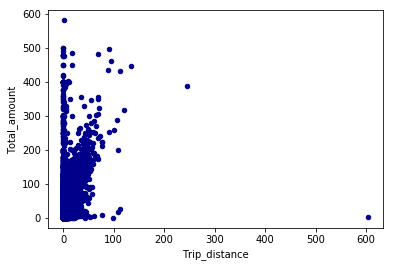

In [53]:
df.plot.scatter(x='Trip_distance', y='Total_amount', c='DarkBlue')

## It seems that credit cards result in the greatest tip amounts, but the trend displayed below could be from a class imbalance 

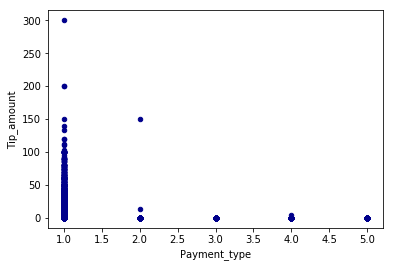

In [62]:
df.plot.scatter(x='Payment_type', y='Tip_amount', c='DarkBlue')

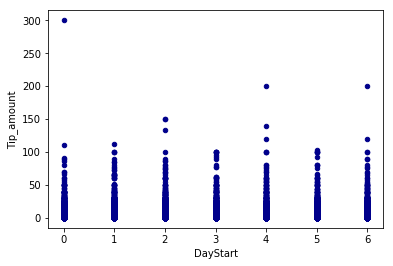

In [64]:
df.plot.scatter(x='DayStart', y='Tip_amount', c='DarkBlue')

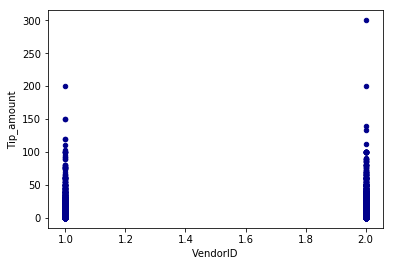

In [65]:
df.plot.scatter(x='VendorID', y='Tip_amount', c='DarkBlue')

# The following scatter plots are focused on the hour. 

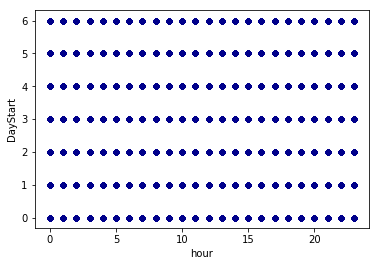

In [66]:
df.plot.scatter(x='hour', y='DayStart', c='DarkBlue')

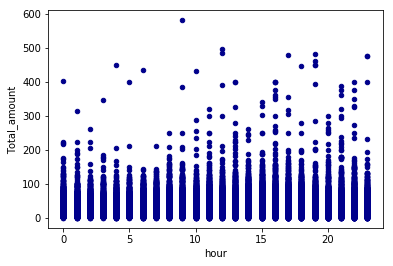

In [67]:
df.plot.scatter(x='hour', y='Total_amount', c='DarkBlue')

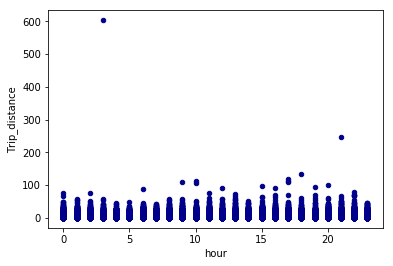

In [68]:
df.plot.scatter(x='hour', y='Trip_distance', c='DarkBlue')

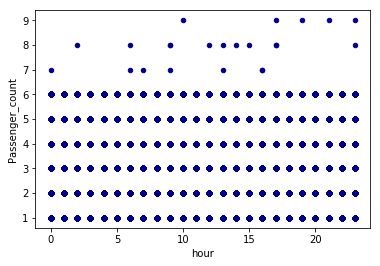

In [69]:
df.plot.scatter(x='hour', y='Passenger_count', c='DarkBlue')

# The following cells will create a simple linear regression model from the data

# From the graphs created above, the most impactful variables see to be RateCodeID, Passenger_count, Trip_distance, Fare_amount, Tip_amount, Total_amount, Payment_type, Trip_type, DayStart, and hour  

# For the catagorical data will need to be converted to one-hot encodings form. 

In [0]:
x_VendorID = df['VendorID'].values

In [0]:
oneHotEnc = sklearn.preprocessing.OneHotEncoder()


In [72]:
oneHotEnc.fit(x_VendorID.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [0]:
x_VendorID_1HOT = oneHotEnc.transform(x_VendorID.reshape(-1, 1)).toarray()

In [74]:
x_VendorID_1HOT

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [75]:
x_VendorID_1HOT.shape

(1470439, 2)

In [76]:
x_RateCodeID = df['RateCodeID'].values
oneHotEnc.fit(x_RateCodeID.reshape(-1, 1))
x_RateCodeID_1HOT = oneHotEnc.transform(x_RateCodeID.reshape(-1, 1)).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [77]:
x_RateCodeID_1HOT.shape

(1470439, 6)

In [78]:
x_RateCodeID_1HOT

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [79]:
x_Payment_type = df['Payment_type'].values
oneHotEnc.fit(x_Payment_type.reshape(-1, 1))
x_Payment_type_1HOT = oneHotEnc.transform(x_Payment_type.reshape(-1, 1)).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [80]:
x_Payment_type_1HOT.shape

(1470439, 5)

In [81]:
x_Payment_type_1HOT

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [82]:
x_Trip_type = df['Trip_type'].values
oneHotEnc.fit(x_Trip_type.reshape(-1, 1))
x_Trip_type_1HOT = oneHotEnc.transform(x_Trip_type.reshape(-1, 1)).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [83]:
x_Trip_type_1HOT

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [84]:
x_DayStart = df['DayStart'].values
oneHotEnc.fit(x_DayStart.reshape(-1, 1))
x_DayStart_1HOT = oneHotEnc.transform(x_DayStart.reshape(-1, 1)).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [85]:
x_DayStart_1HOT

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

# Now that all catagorical data is 1hot encoded, copy all data to a single numpy array

In [0]:
# Combine all catagorical data 

numpyData = np.c_[ x_VendorID_1HOT, x_RateCodeID_1HOT, x_Payment_type_1HOT, x_Trip_type_1HOT, x_DayStart_1HOT ]

In [0]:
# Add non catagorical data

numpyData = np.c_[ numpyData , df[['Passenger_count', 'Trip_distance', 'Fare_amount', 'Total_amount', 'hour']].values ]

In [88]:
numpyData.shape

(1470439, 27)

In [0]:
#Get y data, which is the tip amount 

y = df['Tip_amount'].values

# Perform linear regression 

In [93]:
# Perform 

linReg = sklearn.linear_model.LinearRegression()
linReg.fit(numpyData, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
# Check regression coefficients 

#List of variables, in order :

#  VendorID (7 1hot encodings) , RateCodeID_1HOT(6 1hot encodings), Payment_type (5 1hot encodings)  , Trip_type (2 1hot encodings), DayStart (7 1hot encodings)
# Passenger_count, Trip_distance, Fare_amount, Total_amount, hour

linReg.coef_

array([ 1.52696453e-02, -1.52696453e-02,  8.82621375e-01, -6.88911718e-01,
       -2.59658238e+00, -6.73967881e-02,  1.15752865e+00,  1.31274086e+00,
        4.24677931e-01, -9.73715476e-02, -5.96659629e-02, -1.23131784e-01,
       -1.44508636e-01, -2.55894301e-01,  2.55894301e-01,  1.21495914e-03,
       -3.73419723e-02, -3.39258634e-02, -4.41585146e-02, -5.80795049e-02,
        8.97124845e-02,  8.25784116e-02, -6.97166767e-03, -5.10702120e-02,
       -7.49776143e-01,  7.67527027e-01, -9.02912558e-03])

In [95]:
#  Get coefficient of determination R^2 of the prediction.

linReg.score( numpyData, y)

0.8907923682888873

# Test model with sample data point 

In [106]:
numpyData[7000:7001]

array([[ 0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  8.38, 26.5 , 42.69,  8.  ]])

In [105]:

linReg.predict(numpyData[7000:7001])

array([11.98907843])